In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split


In [169]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [170]:
dataset["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [171]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [172]:
dataset.shape

(768, 9)

### Exploratory Data Analaysis

statistical analysis: mean median mode, iqr, statistical testing (A/B testing)
a) Glucose and Outcome
b) BMI and Outcome
c) Age and outcome
d) blood pressure and Outcome


In [173]:
columns= dataset.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [174]:
mean_col=[]
#dataset.columns
columns= dataset.drop(["Outcome"],axis=1).columns

for i in columns:
    mean_col.append(round(dataset[i].mean(),2))

mean_of_columns = [f"Mean of {columns[i]} is {mean_col[i]}" for i in range(len(columns))]

print(mean_of_columns)


['Mean of Pregnancies is 3.85', 'Mean of Glucose is 120.89', 'Mean of BloodPressure is 69.11', 'Mean of SkinThickness is 20.54', 'Mean of Insulin is 79.8', 'Mean of BMI is 31.99', 'Mean of DiabetesPedigreeFunction is 0.47', 'Mean of Age is 33.24']


In [175]:
## glucose levels for two groups
## age level for ppl with diabetes (outcome ==1)


In [176]:
def age_bands(age):
    if age<= 20:
        return "< 20"
    if age >20 and age<=30:
        return "21-30"
    if age >30 and age <=40:
        return "31-40"
    if age >40 and age <=50:
        return "41-50"
    if age >50 and age <=60:
        return "51-60"
    if age >60 :
        return "Over 60"



In [177]:
dataset["Age_Band"] = dataset["Age"].apply(age_bands)

In [178]:
diabetes_dataset = dataset[dataset["Outcome"] == 1]
non_diabetes_dataset = dataset[dataset["Outcome"] == 0]

In [179]:
non_diabetes_dataset.Glucose.mean()

np.float64(109.98)

In [180]:
diabetes_dataset.Glucose.mean()

np.float64(141.25746268656715)

In [181]:
(dataset==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
Age_Band                      0
dtype: int64

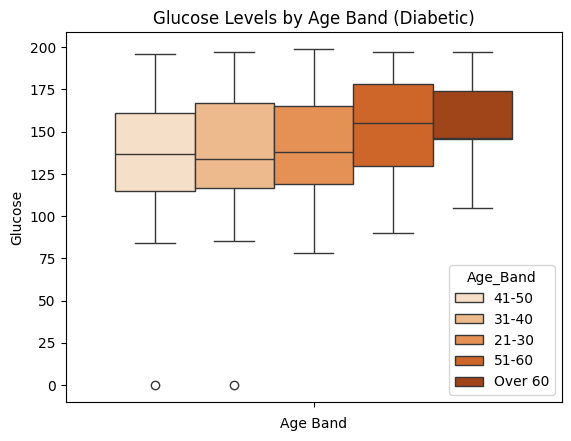

In [182]:
sns.boxplot(data=diabetes_dataset, hue='Age_Band', y='Glucose', palette='Oranges')
plt.title('Glucose Levels by Age Band (Diabetic)')
plt.ylabel('Glucose')
plt.xlabel('Age Band')
plt.show()



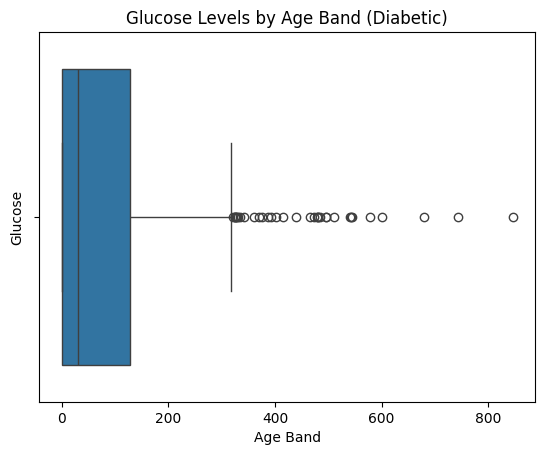

In [183]:
sns.boxplot(data=dataset, x='Insulin')
plt.title('Glucose Levels by Age Band (Diabetic)')
plt.ylabel('Glucose')
plt.xlabel('Age Band')
plt.show()



In [184]:
dataset.shape

(768, 10)

In [185]:
## Encoding
# converting bmi into underweight normal, obesity, 1 obesity 2, obesity 3
# insulin normal abnormal
# glucose low normal overweight
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Band
0,6,148,72,35,0,33.6,0.627,50,1,41-50
1,1,85,66,29,0,26.6,0.351,31,0,31-40
2,8,183,64,0,0,23.3,0.672,32,1,31-40
3,1,89,66,23,94,28.1,0.167,21,0,21-30
4,0,137,40,35,168,43.1,2.288,33,1,31-40


In [186]:
# Dividing dataset into independent and dependent Features

X = dataset.drop(['Outcome', 'Age_Band'], axis=1)
y = dataset['Outcome']


In [187]:
(X==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.35, 
                                   shuffle=True)


In [189]:
dataset.groupby('Outcome')['Insulin'].median()

Outcome
0    39.0
1     0.0
Name: Insulin, dtype: float64

In [190]:
(dataset['Insulin']==0).sum()

np.int64(374)

In [191]:
def remove_zeroes(X_train, X_test, y_train, y_test):
    """
    Replaces 0s with NaN and fills NaNs using mean or median based on strategy_dict.

    Parameters:
    df : DataFrame
        The dataframe to modify (e.g., X_train).
    strategy_dict : dict
        Format: {'col1': 'mean', 'col2': 'median', ...}

    Returns:
    DataFrame with zeroes replaced and NaNs filled.
    """
    train_combined = X_train.copy()
    train_combined['Outcome'] = y_train.values
    test_combined = X_test.copy()
    test_combined['Outcome'] = y_test.values
    columns= X_train.columns

    for col in columns:
        train_combined[col] = train_combined[col].replace(0, np.nan)
        test_combined[col] = test_combined[col].replace(0, np.nan) 

        # Step 3: Fill NaN in col with group-wise median
        if col== 'Insulin':
            train_combined[col] = train_combined.groupby('Outcome')[col].transform(lambda x: x.fillna(x.mean().round(2)))
            test_combined[col] = test_combined.groupby('Outcome')[col].transform(lambda x: x.fillna(x.mean().round(2)))
        else:
            train_combined[col] = train_combined.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))
            test_combined[col] = test_combined.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))


        # Step 4: Drop Outcome column to get back to original X format
    X_train = train_combined.drop(columns=['Outcome'])
    X_test = test_combined.drop(columns=['Outcome'])
    return X_train, X_test


In [192]:
X_train, X_test = remove_zeroes(X_train, X_test, y_train, y_test)

In [193]:
X_test['Glucose'].max()

np.float64(199.0)

In [194]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [195]:
y_train

0      0
1      0
2      0
3      0
4      1
      ..
647    1
648    1
649    1
650    1
651    1
Name: Outcome, Length: 652, dtype: int64

In [196]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi <= 25:
        return "Normal"
    elif bmi <= 30:
        return "Overweight"
    elif bmi <= 35:
        return "Obesity I"
    elif bmi <= 40:
        return "Obesity II"
    else:
        return "Obesity III"

def categorize_glucose(glucose):
    if glucose < 70:
        return "Low Glucose"
    elif glucose <= 99:
        return "Normal"
    elif glucose <= 125:
        return "Prediabetic"
    else:
        return "High Glucose"

In [197]:
# # Feature Engineering
# # df.loc[row, col]
# X_train.loc[(X_train["BMI"] < 18.5) , "BMI"] = 'Underweight'
# X_train.loc[(X_train["BMI"] >= 18.5)  & (X_train["BMI"] <= 25), "BMI"] = 'Normal'
# X_train.loc[(X_train["BMI"] > 25 ) & (X_train["BMI"] <= 30), "BMI"] = 'Overweight'
# X_train.loc[(X_train["BMI"] > 30 ) & (X_train["BMI"] <= 35), "BMI"] = 'Obesity I'
# X_train.loc[(X_train["BMI"] > 35)  & (X_train["BMI"] <= 40), "BMI"] = 'Obesity II'
# X_train.loc[(X_train["BMI"] > 40 ), "BMI"] = 'Obesity III'

# # Feature Engineering
# # df.loc[row, col]
# X_test.loc[(X_test["BMI"] < 18.5) , "BMI"] = 'Underweight'
# X_test.loc[(X_test["BMI"] >= 18.5)  & (X_test["BMI"] <= 25), "BMI"] = 'Normal'
# X_test.loc[(X_test["BMI"] > 25 ) & (X_test["BMI"] <= 30), "BMI"] = 'Overweight'
# X_test.loc[(X_test["BMI"] > 30 ) & (X_test["BMI"] <= 35), "BMI"] = 'Obesity I'
# X_test.loc[(X_test["BMI"] > 35)  & (X_test["BMI"] <= 40), "BMI"] = 'Obesity II'
# X_test.loc[(X_test["BMI"] > 40 ), "BMI"] = 'Obesity III'




In [198]:
# # df.loc[row, col]
# X_train.loc[(X_train["Glucose"] < 70), "NewGlucose"] = 'Low Glucose'
# X_train.loc[(X_train["Glucose"] >= 70)  & (X_train["Glucose"] <= 99), "NewGlucose"] = 'Normal'
# X_train.loc[(X_train["Glucose"] > 99 ) & (X_train["Glucose"] <= 125), "NewGlucose"] = 'Prediabetic'
# X_train.loc[(X_train["Glucose"] > 125 ), "NewGlucose"] = 'High Glucose'


# # df.loc[row, col]
# X_test.loc[(X_test["Glucose"] < 70), "NewGlucose"] = 'Low Glucose'
# X_test.loc[(X_test["Glucose"] >= 70)  & (X_test["Glucose"] <= 99), "NewGlucose"] = 'Normal'
# X_test.loc[(X_test["Glucose"] > 99 ) & (X_test["Glucose"] <= 125), "NewGlucose"] = 'Prediabetic'
# X_test.loc[(X_test["Glucose"] > 125), "NewGlucose"] = 'High Glucose'


In [199]:
def insulin_score(insulin):
    if insulin>= 16 and insulin<=165:
        return "Normal"
    else:
        return "Abnormal"


## Applying age bands function on Age column. This column will be used for EDA
X_train["Insulin"] = X_train["Insulin"].apply(insulin_score)
X_test["Insulin"] = X_test["Insulin"].apply(insulin_score)
X_train["Glucose"] = X_train["Glucose"].apply(categorize_glucose)
X_test["Glucose"] = X_test["Glucose"].apply(categorize_glucose)

X_train["BMI"] = X_train["BMI"].apply(categorize_bmi)
X_test["BMI"] = X_test["BMI"].apply(categorize_bmi)

| Feature                          | `.apply()`                                                                   | `.transform()`                                          |
| -------------------------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------- |
| **Shape of Output**              | Output **may change** shape (can return Series/DataFrame of different shape) | Output has **same shape** as the input (1:1 mapping)    |
| **Used for**                     | Aggregation, transformation, custom row/column-wise ops                      | Element-wise or group-wise transformations              |
| **Good for grouping & reducing** | Yes (e.g. `.groupby().apply()`)                                              | No aggregation — only for returning same-length results |
| **Returns**                      | Flexible — can return scalar, Series, or DataFrame                           | Must return Series or array **of the same length**      |
| **Common use-case**              | Custom aggregations, row-wise operations                                     | Filling missing values, scaling, normalization, etc.    |
| **Broadcast to original index**  | Not always                                                                   | Yes — always aligns with original index                 |


In [200]:
### Feature engineering
# 
# split the data
# handle 0
# balance data
# standardise
# log transformation

In [201]:
# skin_thickness_median = X_train['SkinThickness'].median()
# insulin_mean = int(X_train['Insulin'].mean())
# bmi_mean = X_train['BMI'].mean().round(1)
# bp_mean = int(X_train['BloodPressure'].mean())
# 
# X_train['SkinThickness'] = X_train['SkinThickness'].fillna(skin_thickness_median)
# X_train['Insulin'] = X_train['Insulin'].fillna(insulin_mean)
# X_train['BMI'] = X_train['BMI'].fillna(bmi_mean)
# X_train['BloodPressure'] = X_train['BloodPressure'].fillna(bp_mean)
X_test.shape

(269, 8)

In [202]:
## Encoding
# Encode the new columns
label_encoder = LabelEncoder()
X_train['Insulin'] = label_encoder.fit_transform(X_train['Insulin'])
X_test['Insulin'] = label_encoder.transform(X_test['Insulin'])


In [203]:
onehot_encoder_category= OneHotEncoder()
X_train_cat = onehot_encoder_category.fit_transform(X_train[["BMI","Glucose"]])
X_test_cat = onehot_encoder_category.transform(X_test[["BMI","Glucose"]])

# currently its a matrix without any col names

In [ ]:
# X_train= X_train.drop(['Glucose','BMI','Insulin', 'NewBMI', 'NewGlucose'], axis =1 )
# X_test= X_test.drop(['Glucose','BMI','Insulin', 'NewBMI', 'NewGlucose'], axis =1 )



In [204]:
X_train_cat_columns = onehot_encoder_category.get_feature_names_out(["BMI", "Glucose"])
X_test_cat_columns = onehot_encoder_category.get_feature_names_out(["BMI", "Glucose"])
# all col names

In [205]:
# converting into a adataframe
X_train_encoded = pd.DataFrame(X_train_cat.toarray(),columns= X_train_cat_columns)
X_test_encoded = pd.DataFrame(X_test_cat.toarray(),columns= X_test_cat_columns)


In [ ]:
X_train_encoded

In [206]:
import pickle
with open('pickle/label_encoder.pkl','wb') as file:
    pickle.dump(label_encoder, file)
with open('pickle/onehot_encoder.pkl','wb') as file:
    pickle.dump(onehot_encoder_category, file)

In [207]:
X_train= X_train.drop(['Glucose','BMI'], axis =1 )
X_test= X_test.drop(['Glucose','BMI'], axis =1 )



In [208]:
# resetting index 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train_encoded = X_train_encoded.reset_index(drop=True)
X_test_encoded = X_test_encoded.reset_index(drop=True)



In [209]:
cols = X_train.columns
X_train_index = X_train.index
X_test_index = X_test.index

transformer = RobustScaler().fit(X_train)
X_train_scaled=transformer.transform(X_train)
X_test_scaled = transformer.transform(X_test)
X_train_outlier=pd.DataFrame(X_train_scaled, columns = cols, index = X_train_index)
X_test_outlier=pd.DataFrame(X_test_scaled, columns = cols, index = X_test_index)
#X_train_concat = pd.concat([X_train, X_train_encoded], axis=1)
#X_test_concat = pd.concat([X_test, X_test_encoded], axis=1)



In [ ]:
X_train_outlier

In [210]:
with open("pickle/robust_scaler.pkl", "wb") as f:
    pickle.dump(transformer, f)

In [211]:
X_train_df = pd.concat([X_train_outlier, X_train_encoded], axis=1)
X_test_df = pd.concat([X_test_outlier, X_test_encoded], axis=1)



In [ ]:
#y_train = y_train.values.ravel()

In [212]:
with open("pickle/X_train.pkl", "wb") as f:
    pickle.dump(X_train_df, f)

with open("pickle/X_test.pkl", "wb") as f:
    pickle.dump(X_test_df, f)

with open("pickle/y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)

with open("pickle/y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

In [ ]:
X_train_df

In [ ]:
# # Log Transformation
# X_train['DiabetesPedigreeFunction']= np.cbrt(X_train['DiabetesPedigreeFunction'])
# X_test['DiabetesPedigreeFunction']= np.cbrt(X_test['DiabetesPedigreeFunction'])

# sns.histplot(data=X_train, x='DiabetesPedigreeFunction', kde=True, bins=20, color= "red")
# X_train['Insulin']= np.cbrt(X_train['Insulin'])
# X_test['Insulin']= np.cbrt(X_test['Insulin'])

# sns.histplot(data=X_train, x='Insulin', kde=True, bins=20, color= "red")
# X_train['BMI']= np.cbrt(X_train['BMI'])
# X_test['BMI']= np.cbrt(X_test['BMI'])

# sns.histplot(data=X_train, x='BMI', kde=True, bins=20, color= "red")

# fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2 rows, 2 columns

# sns.histplot(data=X_train, x='Glucose', kde=True, bins=20, color= "red",ax=axes[0, 0])
# axes[0,0].set_title('Glucose Distribution (Diabetic) vs non diabetic')
# axes[0,0].set_xlabel('Glucose Level ')
# axes[0,0].set_ylabel('Frequency')


# sns.histplot(data=X_train, x='DiabetesPedigreeFunction', kde=True, bins=20, color= "red", ax=axes[0, 1])
# axes[0,1].set_title('DiabetesPedigreeFunction Distribution (Diabetic) vs non diabetic')
# axes[0,1].set_xlabel('DiabetesPedigreeFunction ')
# axes[0,1].set_ylabel('Frequency')

# sns.histplot(data=X_train, x='BMI', kde=True, bins=20, color= "red", ax=axes[1,0])
# axes[1,0].set_title('BMI Distribution (Diabetic) vs non diabetic')
# axes[1,0].set_xlabel('BMI ')
# axes[1,0].set_ylabel('Frequency')

# sns.histplot(data=X_train, x='BloodPressure', kde=True, bins=20, color= "red", ax=axes[1,1])
# axes[1,1].set_title('BloodPressure Distribution (Diabetic) vs non diabetic')
# axes[1,1].set_xlabel('BloodPressure ')
# axes[1,1].set_ylabel('Frequency')


# sns.histplot(data=X_train, x='SkinThickness', kde=True, bins=20, color= "red", ax=axes[2,0])
# axes[2,0].set_title('SkinThickness Distribution (Diabetic) vs non diabetic')
# axes[2,0].set_xlabel('SkinThickness ')
# axes[2,0].set_ylabel('Frequency')

# sns.histplot(data=X_train, x='Insulin', kde=True, bins=20, color= "red", ax=axes[2,1])
# axes[2,1].set_title('Insulin Distribution (Diabetic) vs non diabetic')
# axes[2,1].set_xlabel('Insulin ')
# axes[2,1].set_ylabel('Frequency')

# plt.show()



In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_df)
# X_test_scaled = scaler.transform(X_test_df)


In [ ]:
## Building models

## Logistic 
## hyperparameters tuning
## maybe manual way

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_df, y_train)

In [ ]:
y_pred = lr.predict(X_test_df)


In [ ]:
y_test.shape

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_recall_fscore_support, f1_score, precision_score
acc = accuracy_score(y_test, y_pred) * 100


recall = recall_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100


print(f"Logistic Regression model recall_score: {recall:.2f}%")
print(f"Logistic Regression model precision_score : {precision :.2f}%")
print(f"Logistic Regression model f1_score: {f1:.2f}%")
print(f"Logistic Regression model acc: {acc:.2f}%")

In [ ]:
param_grid = [
    {'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag'], 'max_iter': [100, 1000, 2500]},
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 1000, 2500]},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 1000, 2500]}
]


| Solver      | Supports `l1`? | Supports `l2`? | Notes                              |
| ----------- | -------------- | -------------- | ---------------------------------- |
| `liblinear` | ✅ Yes          | ✅ Yes          | Good for small datasets            |
| `lbfgs`     | ❌ No           | ✅ Yes          | Fast for large datasets            |
| `newton-cg` | ❌ No           | ✅ Yes          | Only `l2`                          |
| `sag`       | ❌ No           | ✅ Yes          | Only `l2`                          |
| `saga`      | ✅ Yes          | ✅ Yes          | Supports both, good for large data |


In [ ]:
from sklearn.model_selection import GridSearchCV
model_lr = LogisticRegression()

clf = GridSearchCV(model_lr,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
clf

In [ ]:
best_clf = clf.fit(X_train_df,y_train)
best_clf.best_estimator_

In [ ]:
print("Best Parameters:", best_clf.best_params_)
print("Best Score:", best_clf.best_score_)


In [ ]:
best_lr = clf.best_estimator_
y_pred = best_lr.predict(X_test_df)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


In [ ]:
#acc = accuracy_score(y_test, lr.predict(X_test_scaled)) * 100

print(f'Accuracy - : {best_clf.score(X_test_df,y_test):.3f}')